In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv("sample_data/HousePricePrediction.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info() # Jumlah data tidak sama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True) # Menyamakan jumlah data dengan jumlah data terendah
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
X = data.drop(["median_house_value"], axis=1)
y = data.loc[:,["median_house_value"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [7]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8274,-118.17,33.77,25.0,4405.0,1262.0,2178.0,1090.0,3.0503,NEAR OCEAN,225000.0
912,-122.00,37.54,26.0,1910.0,371.0,852.0,357.0,5.8325,<1H OCEAN,298900.0
3854,-118.43,34.18,25.0,3830.0,1105.0,2328.0,1017.0,2.6238,<1H OCEAN,210000.0
13606,-117.27,34.17,16.0,30.0,3.0,49.0,8.0,4.6250,INLAND,250000.0
5946,-117.85,34.14,35.0,1582.0,248.0,654.0,221.0,4.9091,INLAND,275000.0
...,...,...,...,...,...,...,...,...,...,...
7998,-118.16,33.85,36.0,1979.0,339.0,952.0,339.0,4.0815,<1H OCEAN,216200.0
3205,-119.62,36.35,10.0,3674.0,734.0,1864.0,718.0,2.6145,INLAND,80300.0
10824,-117.92,33.65,25.0,1679.0,470.0,1314.0,473.0,4.1026,<1H OCEAN,211500.0
3012,-118.95,34.83,18.0,3278.0,762.0,1338.0,550.0,2.9891,INLAND,116500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

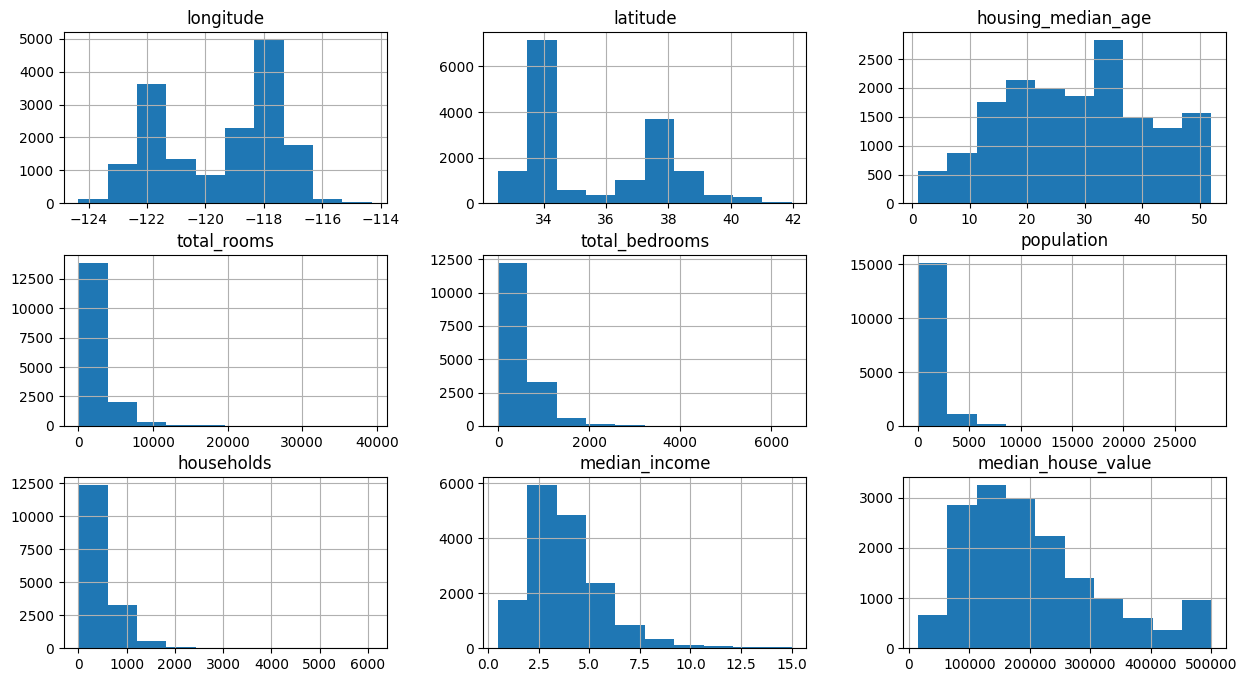

In [8]:
train_data.hist(figsize=(15,8))

<Axes: >

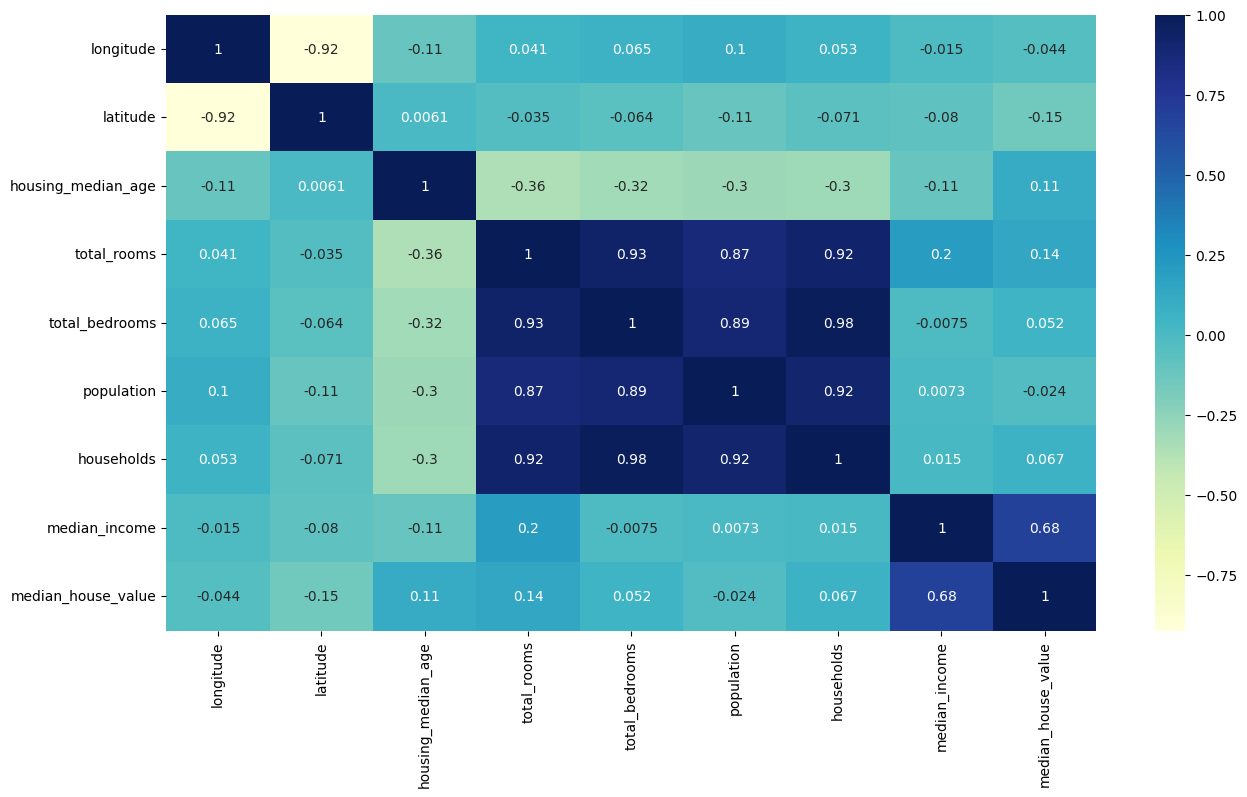

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

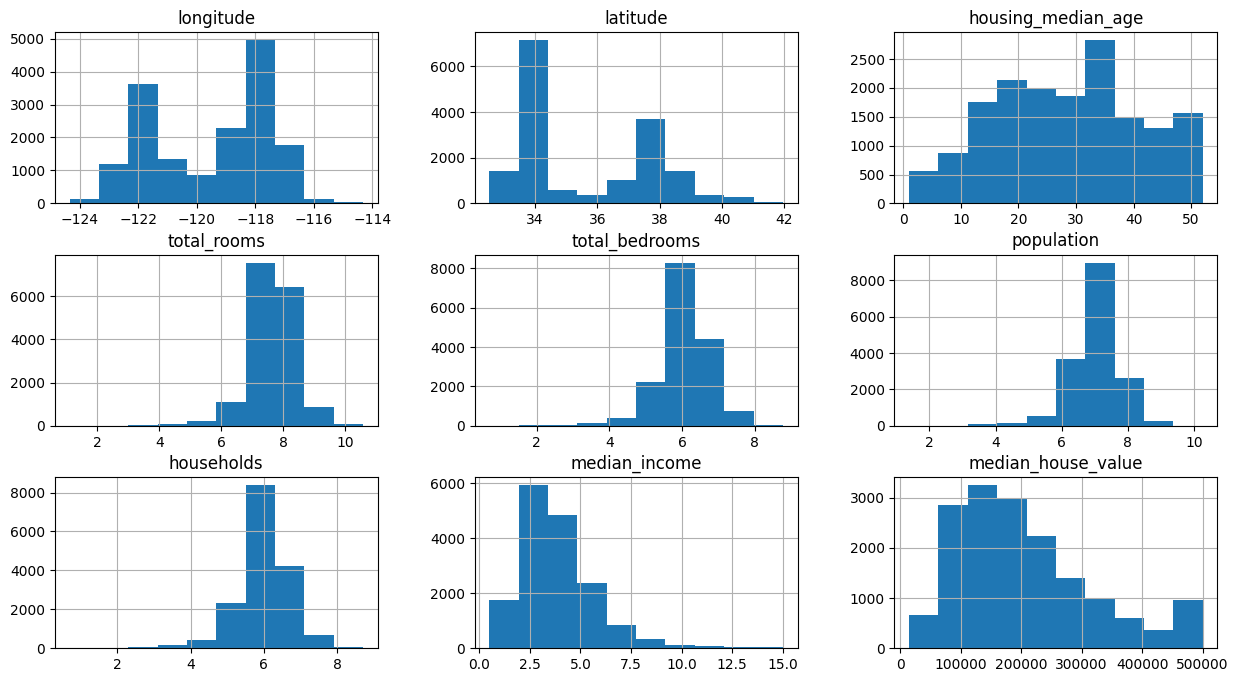

In [10]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)
train_data.hist(figsize=(15,8))

In [11]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7233
INLAND        5186
NEAR OCEAN    2110
NEAR BAY      1814
ISLAND           3
Name: ocean_proximity, dtype: int64

In [12]:
ocean = pd.get_dummies(train_data.ocean_proximity)
ocean

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8274,0,0,0,0,1
912,1,0,0,0,0
3854,1,0,0,0,0
13606,0,1,0,0,0
5946,0,1,0,0,0
...,...,...,...,...,...
7998,1,0,0,0,0
3205,0,1,0,0,0
10824,1,0,0,0,0
3012,0,1,0,0,0


In [13]:
train_data = train_data.drop(["ocean_proximity"], axis=1)
train_data = train_data.join(ocean)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8274,-118.17,33.77,25.0,8.390723,7.141245,7.686621,6.994850,3.0503,225000.0,0,0,0,0,1
912,-122.00,37.54,26.0,7.555382,5.918894,6.748760,5.880533,5.8325,298900.0,1,0,0,0,0
3854,-118.43,34.18,25.0,8.250881,7.008505,7.753194,6.925595,2.6238,210000.0,1,0,0,0,0
13606,-117.27,34.17,16.0,3.433987,1.386294,3.912023,2.197225,4.6250,250000.0,0,1,0,0,0
5946,-117.85,34.14,35.0,7.367077,5.517453,6.484635,5.402677,4.9091,275000.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7998,-118.16,33.85,36.0,7.590852,5.828946,6.859615,5.828946,4.0815,216200.0,1,0,0,0,0
3205,-119.62,36.35,10.0,8.209308,6.599870,7.531016,6.577861,2.6145,80300.0,0,1,0,0,0
10824,-117.92,33.65,25.0,7.426549,6.154858,7.181592,6.161207,4.1026,211500.0,1,0,0,0,0
3012,-118.95,34.83,18.0,8.095294,6.637258,7.199678,6.311735,2.9891,116500.0,0,1,0,0,0


<Axes: >

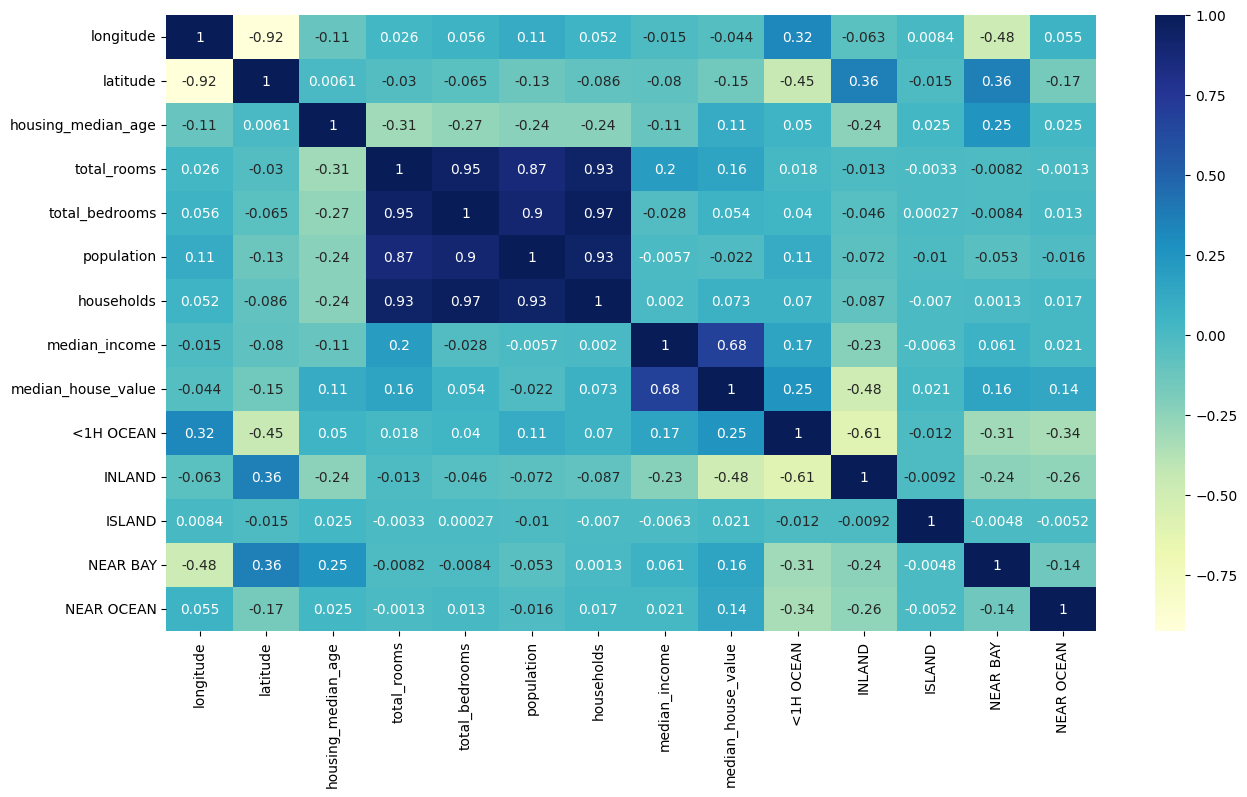

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

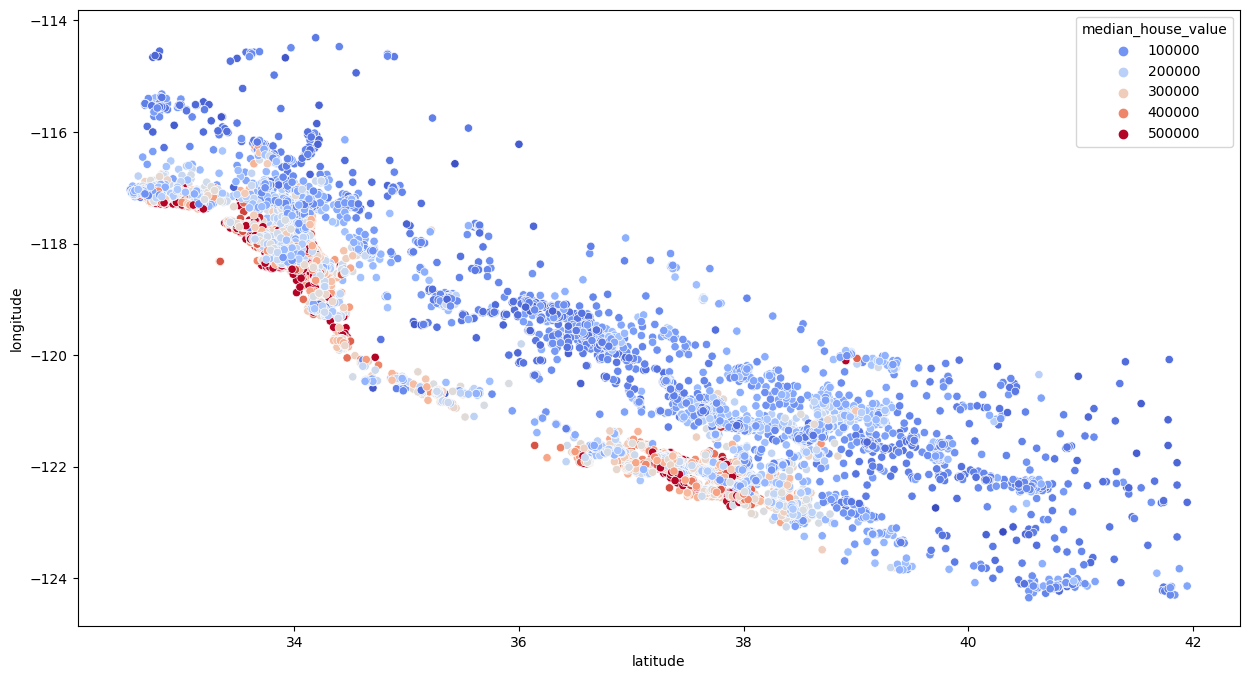

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data,  hue="median_house_value",palette="coolwarm",)

In [16]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data["households"]

<Axes: >

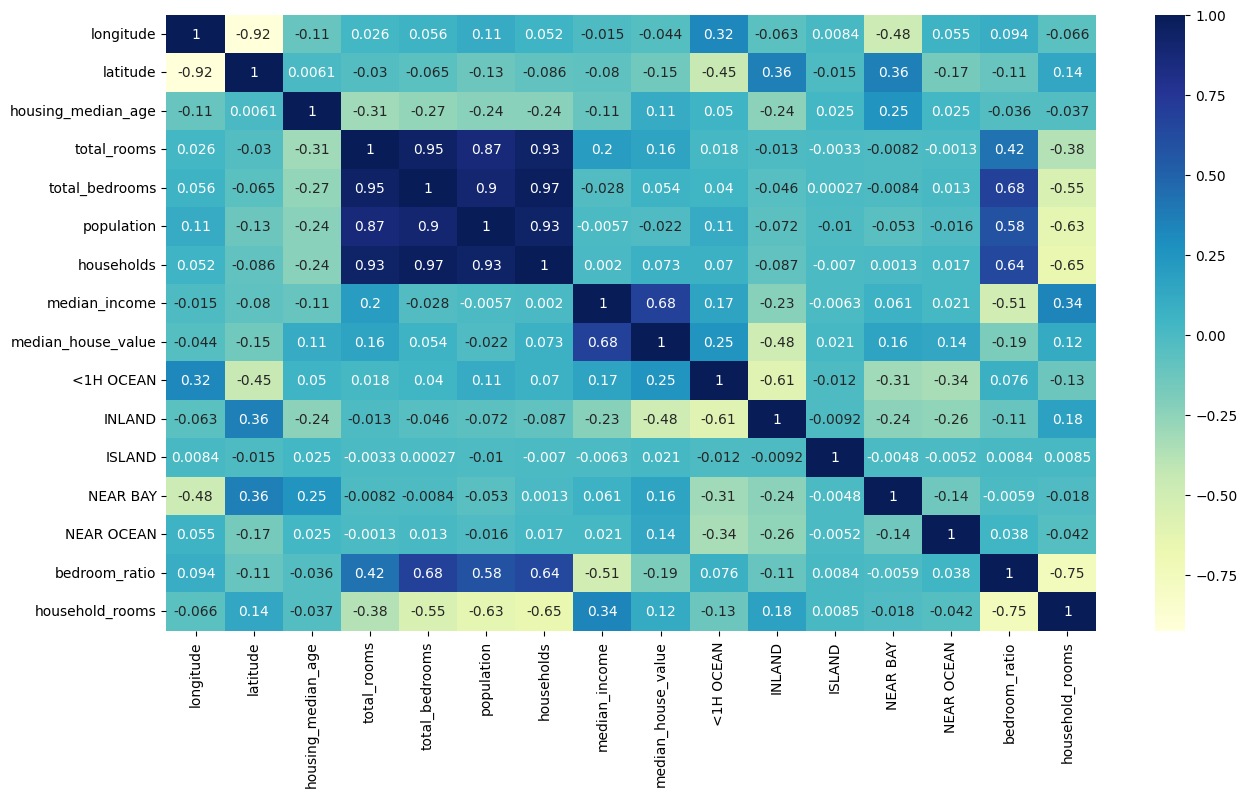

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [23]:
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']


In [24]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8274,-118.17,33.77,25.0,8.390723,7.141245,7.686621,6.994850,3.0503,0,0,0,0,1,0.851088,1.199557
912,-122.00,37.54,26.0,7.555382,5.918894,6.748760,5.880533,5.8325,1,0,0,0,0,0.783401,1.284812
3854,-118.43,34.18,25.0,8.250881,7.008505,7.753194,6.925595,2.6238,1,0,0,0,0,0.849425,1.191361
13606,-117.27,34.17,16.0,3.433987,1.386294,3.912023,2.197225,4.6250,0,1,0,0,0,0.403698,1.562875
5946,-117.85,34.14,35.0,7.367077,5.517453,6.484635,5.402677,4.9091,0,1,0,0,0,0.748934,1.363597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7998,-118.16,33.85,36.0,7.590852,5.828946,6.859615,5.828946,4.0815,1,0,0,0,0,0.767891,1.302268
3205,-119.62,36.35,10.0,8.209308,6.599870,7.531016,6.577861,2.6145,0,1,0,0,0,0.803950,1.248021
10824,-117.92,33.65,25.0,7.426549,6.154858,7.181592,6.161207,4.1026,1,0,0,0,0,0.828764,1.205372
3012,-118.95,34.83,18.0,8.095294,6.637258,7.199678,6.311735,2.9891,0,1,0,0,0,0.819891,1.282578


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

 

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data["households"]

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,household_rooms
8325,-118.29,33.94,38.0,7.786552,6.447306,7.481556,6.333280,1.5615,<1H OCEAN,108600.0,0.828005,1.229466
16779,-122.48,37.68,31.0,8.162516,6.483107,7.739359,6.470800,5.5647,NEAR OCEAN,268700.0,0.794254,1.261439
20594,-121.57,39.16,21.0,7.535297,5.713733,6.769642,5.710427,3.7250,INLAND,84700.0,0.758262,1.319568
12218,-117.23,33.57,6.0,9.526974,7.727535,8.676076,7.594381,3.9617,<1H OCEAN,183000.0,0.811122,1.254477
14158,-117.08,32.76,27.0,7.108244,5.541264,6.408529,5.560682,3.0833,NEAR OCEAN,155400.0,0.779554,1.278304
...,...,...,...,...,...,...,...,...,...,...,...,...
16639,-120.65,35.29,36.0,7.570959,5.755742,6.746412,5.700444,3.1818,NEAR OCEAN,249600.0,0.760240,1.328135
10990,-117.81,33.74,24.0,7.899895,6.476972,7.554335,6.440947,3.3047,<1H OCEAN,216900.0,0.819881,1.226512
13805,-117.03,34.91,27.0,7.908019,6.369901,7.295056,6.234411,2.8250,INLAND,76600.0,0.805499,1.268447
19856,-119.41,36.35,20.0,7.463937,5.831882,7.237778,5.820083,2.2222,INLAND,52900.0,0.781341,1.282445


In [30]:
ocean2 = pd.get_dummies(test_data.ocean_proximity)
ocean2

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8325,1,0,0,0,0
16779,0,0,0,0,1
20594,0,1,0,0,0
12218,1,0,0,0,0
14158,0,0,0,0,1
...,...,...,...,...,...
16639,0,0,0,0,1
10990,1,0,0,0,0
13805,0,1,0,0,0
19856,0,1,0,0,0


In [33]:
test_data = test_data.drop(['ocean_proximity'], axis=1)

In [37]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8325,-118.29,33.94,38.0,7.786552,6.447306,7.481556,6.333280,1.5615,108600.0,0.828005,1.229466,1,0,0,0,0
16779,-122.48,37.68,31.0,8.162516,6.483107,7.739359,6.470800,5.5647,268700.0,0.794254,1.261439,0,0,0,0,1
20594,-121.57,39.16,21.0,7.535297,5.713733,6.769642,5.710427,3.7250,84700.0,0.758262,1.319568,0,1,0,0,0
12218,-117.23,33.57,6.0,9.526974,7.727535,8.676076,7.594381,3.9617,183000.0,0.811122,1.254477,1,0,0,0,0
14158,-117.08,32.76,27.0,7.108244,5.541264,6.408529,5.560682,3.0833,155400.0,0.779554,1.278304,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16639,-120.65,35.29,36.0,7.570959,5.755742,6.746412,5.700444,3.1818,249600.0,0.760240,1.328135,0,0,0,0,1
10990,-117.81,33.74,24.0,7.899895,6.476972,7.554335,6.440947,3.3047,216900.0,0.819881,1.226512,1,0,0,0,0
13805,-117.03,34.91,27.0,7.908019,6.369901,7.295056,6.234411,2.8250,76600.0,0.805499,1.268447,0,1,0,0,0
19856,-119.41,36.35,20.0,7.463937,5.831882,7.237778,5.820083,2.2222,52900.0,0.781341,1.282445,0,1,0,0,0


In [40]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8274,-118.17,33.77,25.0,8.390723,7.141245,7.686621,6.994850,3.0503,225000.0,0,0,0,0,1,0.851088,1.199557
912,-122.00,37.54,26.0,7.555382,5.918894,6.748760,5.880533,5.8325,298900.0,1,0,0,0,0,0.783401,1.284812
3854,-118.43,34.18,25.0,8.250881,7.008505,7.753194,6.925595,2.6238,210000.0,1,0,0,0,0,0.849425,1.191361
13606,-117.27,34.17,16.0,3.433987,1.386294,3.912023,2.197225,4.6250,250000.0,0,1,0,0,0,0.403698,1.562875
5946,-117.85,34.14,35.0,7.367077,5.517453,6.484635,5.402677,4.9091,275000.0,0,1,0,0,0,0.748934,1.363597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7998,-118.16,33.85,36.0,7.590852,5.828946,6.859615,5.828946,4.0815,216200.0,1,0,0,0,0,0.767891,1.302268
3205,-119.62,36.35,10.0,8.209308,6.599870,7.531016,6.577861,2.6145,80300.0,0,1,0,0,0,0.803950,1.248021
10824,-117.92,33.65,25.0,7.426549,6.154858,7.181592,6.161207,4.1026,211500.0,1,0,0,0,0,0.828764,1.205372
3012,-118.95,34.83,18.0,8.095294,6.637258,7.199678,6.311735,2.9891,116500.0,0,1,0,0,0,0.819891,1.282578


In [53]:
kolom = []
for i in range(train_data.shape[1]):
  kolom.append(train_data.columns[i])

In [52]:
train_data.shape[1]

16

In [55]:
test_data = test_data.reindex(columns=kolom)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8325,-118.29,33.94,38.0,7.786552,6.447306,7.481556,6.333280,1.5615,108600.0,1,0,0,0,0,0.828005,1.229466
16779,-122.48,37.68,31.0,8.162516,6.483107,7.739359,6.470800,5.5647,268700.0,0,0,0,0,1,0.794254,1.261439
20594,-121.57,39.16,21.0,7.535297,5.713733,6.769642,5.710427,3.7250,84700.0,0,1,0,0,0,0.758262,1.319568
12218,-117.23,33.57,6.0,9.526974,7.727535,8.676076,7.594381,3.9617,183000.0,1,0,0,0,0,0.811122,1.254477
14158,-117.08,32.76,27.0,7.108244,5.541264,6.408529,5.560682,3.0833,155400.0,0,0,0,0,1,0.779554,1.278304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16639,-120.65,35.29,36.0,7.570959,5.755742,6.746412,5.700444,3.1818,249600.0,0,0,0,0,1,0.760240,1.328135
10990,-117.81,33.74,24.0,7.899895,6.476972,7.554335,6.440947,3.3047,216900.0,1,0,0,0,0,0.819881,1.226512
13805,-117.03,34.91,27.0,7.908019,6.369901,7.295056,6.234411,2.8250,76600.0,0,1,0,0,0,0.805499,1.268447
19856,-119.41,36.35,20.0,7.463937,5.831882,7.237778,5.820083,2.2222,52900.0,0,1,0,0,0,0.781341,1.282445


In [56]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data["median_house_value"]


In [57]:
model.score(X_test,y_test)

0.6722288937735375

In [48]:
train_data.columns[0:9]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [49]:
train_data.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'bedroom_ratio', 'household_rooms'],
      dtype='object')

In [61]:
scaller = StandardScaler()

X_train_scl = scaller.fit_transform(X_train)

model.fit(X_train_scl, y_train)

LinearRegression()

In [63]:
X_test_scl = scaller.fit_transform(X_test)

model.score(X_test_scl, y_test)

0.6708456447508786

In [68]:
model2 = RandomForestRegressor()

model2.fit(X_train_scl, y_train)

RandomForestRegressor()

In [71]:
model2.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
model2.score(X_test,y_test)

0.830389479346877

In [69]:
model2.score(X_test_scl,y_test)

0.8146231219535541

In [78]:
param_grid = {
    "n_estimators": [150,200,250,300],
    "max_features":[8,10,12,14],
    "max_depth":[10,15,20],
    "min_samples_split":[2,4,6,8]
}
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_scl, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': [8, 10, 12, 14],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [150, 200, 250, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
best = grid_search.best_estimator_

In [81]:
best.score(X_test_scl, y_test)

0.8195002808196378

In [79]:
best2 = grid_search.best_estimator_
best.score(X_test_scl, y_test)

0.8187816479946445